In [1]:
!pip install tensorflow==2.8.0

# Importing useful Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [3]:
import tensorflow
print (tensorflow.__version__)

2.8.0


# Download and show dataset

Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


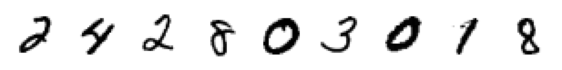

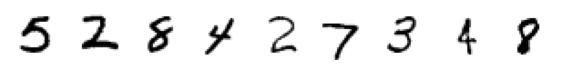

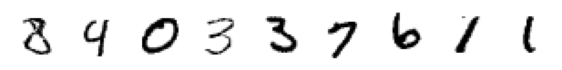

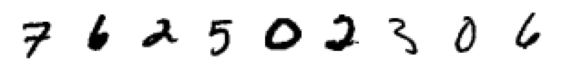

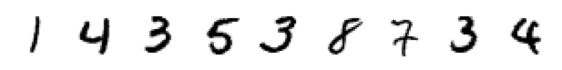

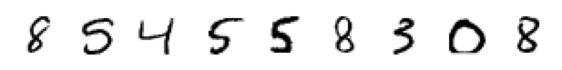

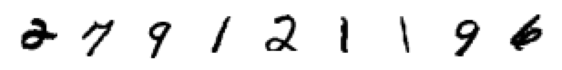

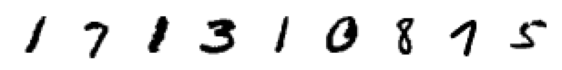

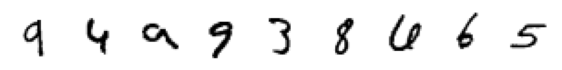

In [4]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))


for k in range(9):
    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = np.random.randint(0, 10000)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

# Data Normalization

In [5]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Define Generator Network

In [6]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(1200, activation='relu')(random_input)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
x = tensorflow.keras.layers.Dense(1000, activation='relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
x = tensorflow.keras.layers.Dense(28*28)(x)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense (Dense)               (None, 1200)              61200     
                                                                 
 batch_normalization (BatchN  (None, 1200)             4800      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1000)              1201000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 784)               784784

# Define Discriminator Network

In [7]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(256, activation='relu')(x)
x = tensorflow.keras.layers.Dropout(0.3)(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)
x = tensorflow.keras.layers.Dropout(0.5)(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129 

In [8]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.00005, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN, Defining combined model

In [9]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

gan_model = tensorflow.keras.models.Model(random_input, d_output)
gan_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 model (Functional)          (None, 28, 28, 1)         2055784   
                                                                 
 model_1 (Functional)        (None, 1)                 233985    
                                                                 
Total params: 2,289,769
Trainable params: 2,051,384
Non-trainable params: 238,385
_________________________________________________________________


# Compiling GAN

In [10]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [11]:
# Indices of Zero Images
indices = [i for i in range(len(trainX))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size)
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(7, 7))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j,:,:,-1], cmap='gray_r')
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training GAN

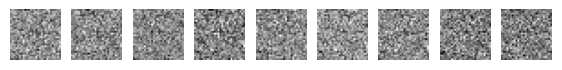

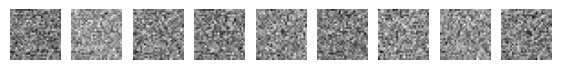

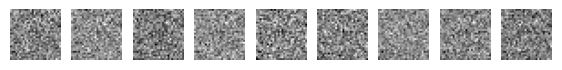

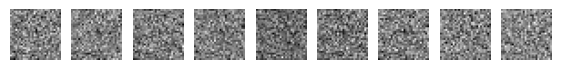

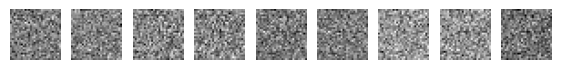

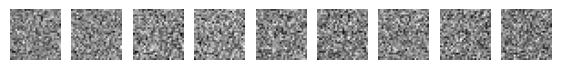

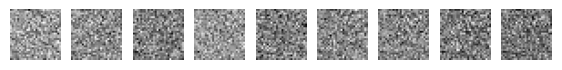

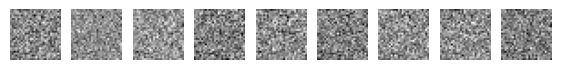

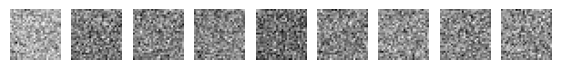

Epoch:0, Step:0, D-Loss:0.877, D-Acc:50.000, G-Loss:0.470
Epoch:0, Step:50, D-Loss:0.176, D-Acc:99.000, G-Loss:2.715
Epoch:0, Step:100, D-Loss:0.074, D-Acc:100.000, G-Loss:4.623
Epoch:0, Step:150, D-Loss:0.042, D-Acc:100.000, G-Loss:5.853
Epoch:0, Step:200, D-Loss:0.023, D-Acc:100.000, G-Loss:7.387
Epoch:0, Step:250, D-Loss:0.025, D-Acc:99.000, G-Loss:9.252
Epoch:0, Step:300, D-Loss:0.026, D-Acc:99.000, G-Loss:10.402
Epoch:0, Step:350, D-Loss:0.048, D-Acc:99.000, G-Loss:12.311
Epoch:0, Step:400, D-Loss:0.104, D-Acc:97.000, G-Loss:13.627
Epoch:0, Step:450, D-Loss:0.116, D-Acc:96.000, G-Loss:12.159
Epoch:1, Step:0, D-Loss:0.103, D-Acc:96.000, G-Loss:11.209
Epoch:1, Step:50, D-Loss:0.181, D-Acc:94.000, G-Loss:11.114
Epoch:1, Step:100, D-Loss:0.127, D-Acc:98.000, G-Loss:11.107
Epoch:1, Step:150, D-Loss:0.105, D-Acc:98.000, G-Loss:10.879
Epoch:1, Step:200, D-Loss:0.129, D-Acc:97.000, G-Loss:11.476
Epoch:1, Step:250, D-Loss:0.132, D-Acc:98.000, G-Loss:12.354
Epoch:1, Step:300, D-Loss:0.108, 

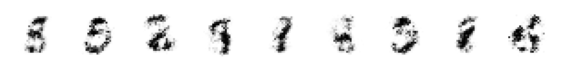

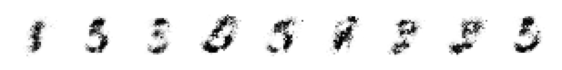

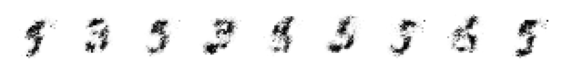

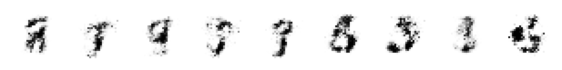

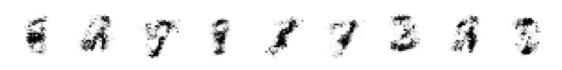

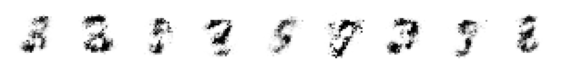

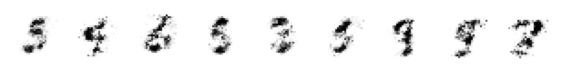

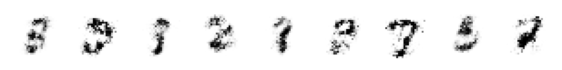

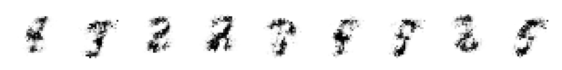

Epoch:10, Step:0, D-Loss:0.284, D-Acc:86.000, G-Loss:1.951
Epoch:10, Step:50, D-Loss:0.362, D-Acc:85.000, G-Loss:2.010
Epoch:10, Step:100, D-Loss:0.295, D-Acc:88.000, G-Loss:2.089
Epoch:10, Step:150, D-Loss:0.288, D-Acc:91.000, G-Loss:1.940
Epoch:10, Step:200, D-Loss:0.281, D-Acc:89.000, G-Loss:2.055
Epoch:10, Step:250, D-Loss:0.366, D-Acc:86.000, G-Loss:2.153
Epoch:10, Step:300, D-Loss:0.423, D-Acc:82.000, G-Loss:1.878
Epoch:10, Step:350, D-Loss:0.334, D-Acc:87.000, G-Loss:1.936
Epoch:10, Step:400, D-Loss:0.344, D-Acc:85.000, G-Loss:1.854
Epoch:10, Step:450, D-Loss:0.315, D-Acc:88.000, G-Loss:1.863
Epoch:11, Step:0, D-Loss:0.474, D-Acc:77.000, G-Loss:1.964
Epoch:11, Step:50, D-Loss:0.358, D-Acc:84.000, G-Loss:1.842
Epoch:11, Step:100, D-Loss:0.353, D-Acc:84.000, G-Loss:1.771
Epoch:11, Step:150, D-Loss:0.455, D-Acc:80.000, G-Loss:1.821
Epoch:11, Step:200, D-Loss:0.270, D-Acc:93.000, G-Loss:1.969
Epoch:11, Step:250, D-Loss:0.462, D-Acc:79.000, G-Loss:1.576
Epoch:11, Step:300, D-Loss:0.3

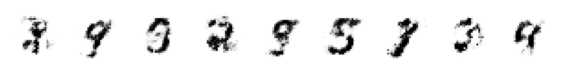

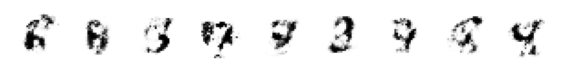

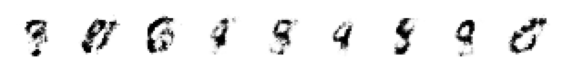

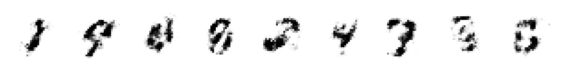

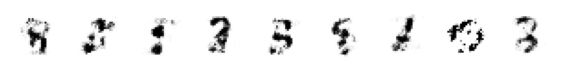

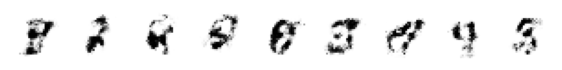

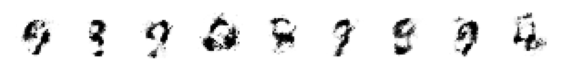

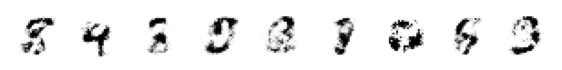

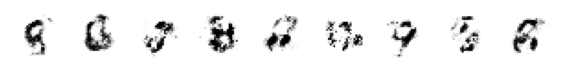

Epoch:20, Step:0, D-Loss:0.426, D-Acc:81.000, G-Loss:1.517
Epoch:20, Step:50, D-Loss:0.533, D-Acc:75.000, G-Loss:1.311
Epoch:20, Step:100, D-Loss:0.455, D-Acc:78.000, G-Loss:1.523
Epoch:20, Step:150, D-Loss:0.421, D-Acc:79.000, G-Loss:1.525
Epoch:20, Step:200, D-Loss:0.412, D-Acc:80.000, G-Loss:1.490
Epoch:20, Step:250, D-Loss:0.399, D-Acc:82.000, G-Loss:1.372
Epoch:20, Step:300, D-Loss:0.447, D-Acc:75.000, G-Loss:1.518
Epoch:20, Step:350, D-Loss:0.391, D-Acc:78.000, G-Loss:1.457
Epoch:20, Step:400, D-Loss:0.486, D-Acc:76.000, G-Loss:1.455
Epoch:20, Step:450, D-Loss:0.457, D-Acc:76.000, G-Loss:1.611
Epoch:21, Step:0, D-Loss:0.401, D-Acc:81.000, G-Loss:1.616
Epoch:21, Step:50, D-Loss:0.577, D-Acc:78.000, G-Loss:1.523
Epoch:21, Step:100, D-Loss:0.498, D-Acc:81.000, G-Loss:1.697
Epoch:21, Step:150, D-Loss:0.371, D-Acc:86.000, G-Loss:1.563
Epoch:21, Step:200, D-Loss:0.391, D-Acc:83.000, G-Loss:1.406
Epoch:21, Step:250, D-Loss:0.475, D-Acc:75.000, G-Loss:1.531
Epoch:21, Step:300, D-Loss:0.4

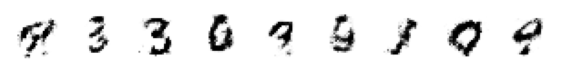

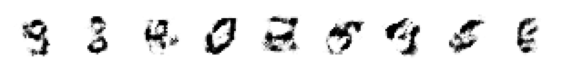

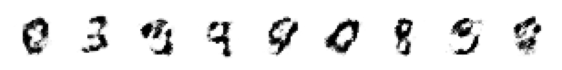

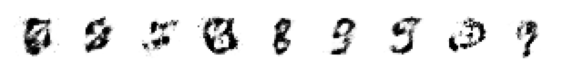

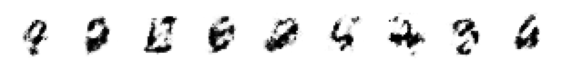

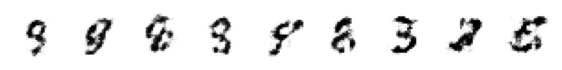

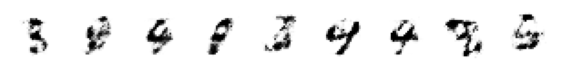

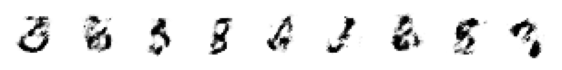

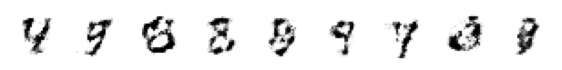

Epoch:30, Step:0, D-Loss:0.514, D-Acc:73.000, G-Loss:1.317
Epoch:30, Step:50, D-Loss:0.576, D-Acc:65.000, G-Loss:1.220
Epoch:30, Step:100, D-Loss:0.488, D-Acc:80.000, G-Loss:1.221
Epoch:30, Step:150, D-Loss:0.453, D-Acc:83.000, G-Loss:1.386
Epoch:30, Step:200, D-Loss:0.474, D-Acc:78.000, G-Loss:1.284
Epoch:30, Step:250, D-Loss:0.477, D-Acc:75.000, G-Loss:1.293
Epoch:30, Step:300, D-Loss:0.528, D-Acc:72.000, G-Loss:1.235
Epoch:30, Step:350, D-Loss:0.492, D-Acc:77.000, G-Loss:1.244
Epoch:30, Step:400, D-Loss:0.566, D-Acc:70.000, G-Loss:1.281
Epoch:30, Step:450, D-Loss:0.471, D-Acc:80.000, G-Loss:1.227
Epoch:31, Step:0, D-Loss:0.518, D-Acc:73.000, G-Loss:1.195
Epoch:31, Step:50, D-Loss:0.451, D-Acc:77.000, G-Loss:1.279
Epoch:31, Step:100, D-Loss:0.500, D-Acc:76.000, G-Loss:1.332
Epoch:31, Step:150, D-Loss:0.524, D-Acc:73.000, G-Loss:1.200
Epoch:31, Step:200, D-Loss:0.524, D-Acc:72.000, G-Loss:1.238
Epoch:31, Step:250, D-Loss:0.563, D-Acc:70.000, G-Loss:1.218
Epoch:31, Step:300, D-Loss:0.5

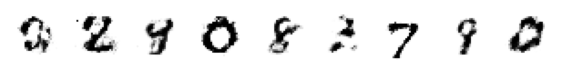

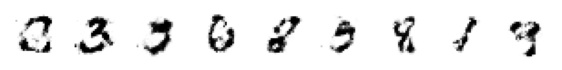

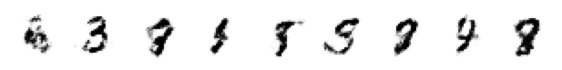

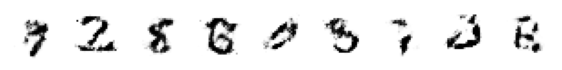

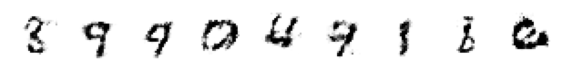

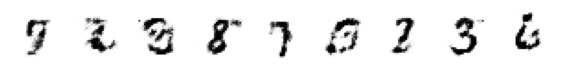

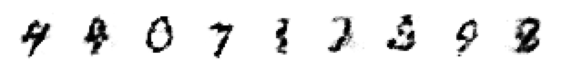

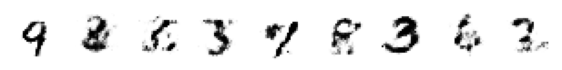

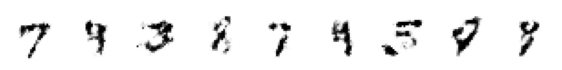

Epoch:40, Step:0, D-Loss:0.580, D-Acc:71.000, G-Loss:1.146
Epoch:40, Step:50, D-Loss:0.475, D-Acc:77.000, G-Loss:1.041
Epoch:40, Step:100, D-Loss:0.526, D-Acc:75.000, G-Loss:1.173
Epoch:40, Step:150, D-Loss:0.640, D-Acc:67.000, G-Loss:1.072
Epoch:40, Step:200, D-Loss:0.538, D-Acc:72.000, G-Loss:1.101
Epoch:40, Step:250, D-Loss:0.568, D-Acc:67.000, G-Loss:1.101
Epoch:40, Step:300, D-Loss:0.574, D-Acc:69.000, G-Loss:1.143
Epoch:40, Step:350, D-Loss:0.564, D-Acc:71.000, G-Loss:1.055
Epoch:40, Step:400, D-Loss:0.596, D-Acc:67.000, G-Loss:1.137
Epoch:40, Step:450, D-Loss:0.600, D-Acc:67.000, G-Loss:1.113
Epoch:41, Step:0, D-Loss:0.520, D-Acc:78.000, G-Loss:0.976
Epoch:41, Step:50, D-Loss:0.554, D-Acc:70.000, G-Loss:1.010
Epoch:41, Step:100, D-Loss:0.572, D-Acc:67.000, G-Loss:1.079
Epoch:41, Step:150, D-Loss:0.600, D-Acc:66.000, G-Loss:1.068
Epoch:41, Step:200, D-Loss:0.591, D-Acc:64.000, G-Loss:0.980
Epoch:41, Step:250, D-Loss:0.578, D-Acc:64.000, G-Loss:1.025
Epoch:41, Step:300, D-Loss:0.5

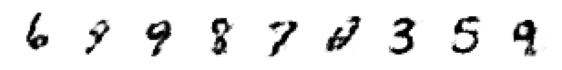

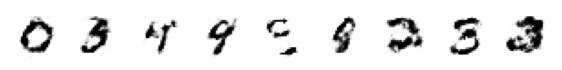

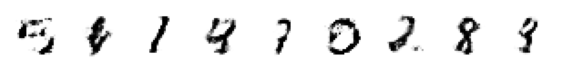

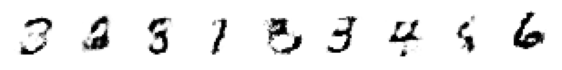

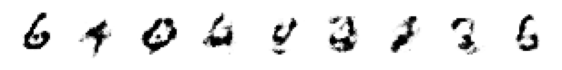

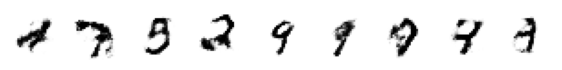

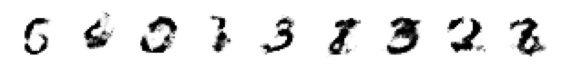

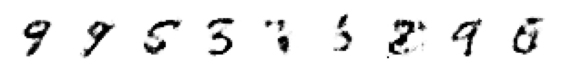

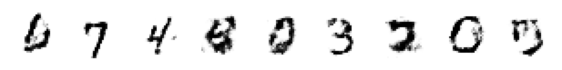

Epoch:50, Step:0, D-Loss:0.588, D-Acc:67.000, G-Loss:1.006
Epoch:50, Step:50, D-Loss:0.593, D-Acc:69.000, G-Loss:0.955
Epoch:50, Step:100, D-Loss:0.579, D-Acc:70.000, G-Loss:0.954
Epoch:50, Step:150, D-Loss:0.581, D-Acc:69.000, G-Loss:0.977
Epoch:50, Step:200, D-Loss:0.626, D-Acc:66.000, G-Loss:1.011
Epoch:50, Step:250, D-Loss:0.535, D-Acc:77.000, G-Loss:1.053
Epoch:50, Step:300, D-Loss:0.650, D-Acc:68.000, G-Loss:0.969
Epoch:50, Step:350, D-Loss:0.579, D-Acc:74.000, G-Loss:0.882
Epoch:50, Step:400, D-Loss:0.635, D-Acc:66.000, G-Loss:0.963
Epoch:50, Step:450, D-Loss:0.552, D-Acc:73.000, G-Loss:0.976
Epoch:51, Step:0, D-Loss:0.582, D-Acc:65.000, G-Loss:0.966
Epoch:51, Step:50, D-Loss:0.571, D-Acc:70.000, G-Loss:1.044
Epoch:51, Step:100, D-Loss:0.548, D-Acc:77.000, G-Loss:0.986
Epoch:51, Step:150, D-Loss:0.611, D-Acc:68.000, G-Loss:1.014
Epoch:51, Step:200, D-Loss:0.569, D-Acc:67.000, G-Loss:0.920
Epoch:51, Step:250, D-Loss:0.631, D-Acc:61.000, G-Loss:0.959
Epoch:51, Step:300, D-Loss:0.6

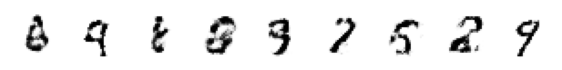

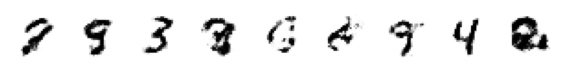

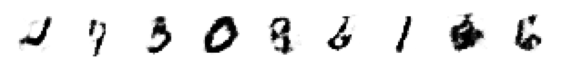

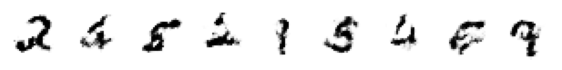

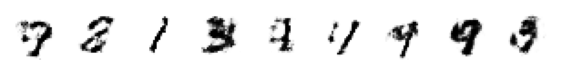

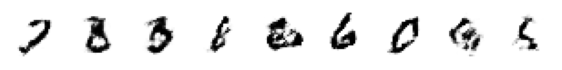

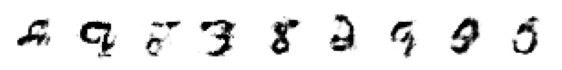

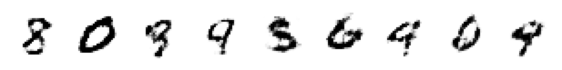

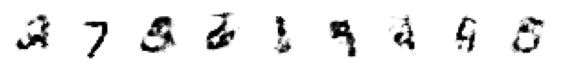

Epoch:60, Step:0, D-Loss:0.606, D-Acc:72.000, G-Loss:0.941
Epoch:60, Step:50, D-Loss:0.641, D-Acc:60.000, G-Loss:0.910
Epoch:60, Step:100, D-Loss:0.618, D-Acc:66.000, G-Loss:0.988
Epoch:60, Step:150, D-Loss:0.645, D-Acc:64.000, G-Loss:0.901
Epoch:60, Step:200, D-Loss:0.655, D-Acc:67.000, G-Loss:0.944
Epoch:60, Step:250, D-Loss:0.578, D-Acc:66.000, G-Loss:0.952
Epoch:60, Step:300, D-Loss:0.570, D-Acc:66.000, G-Loss:0.945
Epoch:60, Step:350, D-Loss:0.619, D-Acc:64.000, G-Loss:0.886
Epoch:60, Step:400, D-Loss:0.691, D-Acc:58.000, G-Loss:0.898
Epoch:60, Step:450, D-Loss:0.618, D-Acc:57.000, G-Loss:0.909
Epoch:61, Step:0, D-Loss:0.658, D-Acc:65.000, G-Loss:0.979
Epoch:61, Step:50, D-Loss:0.662, D-Acc:58.000, G-Loss:0.987
Epoch:61, Step:100, D-Loss:0.598, D-Acc:67.000, G-Loss:0.865
Epoch:61, Step:150, D-Loss:0.559, D-Acc:71.000, G-Loss:0.961
Epoch:61, Step:200, D-Loss:0.605, D-Acc:63.000, G-Loss:0.969
Epoch:61, Step:250, D-Loss:0.634, D-Acc:58.000, G-Loss:0.918
Epoch:61, Step:300, D-Loss:0.6

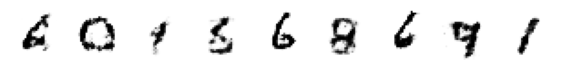

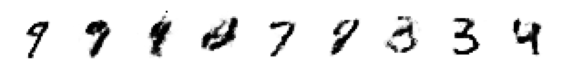

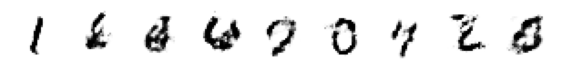

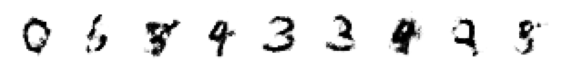

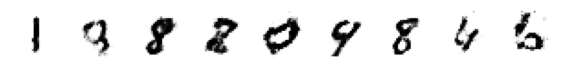

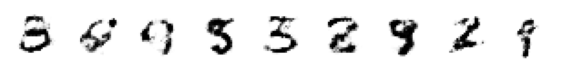

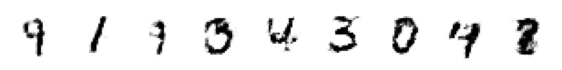

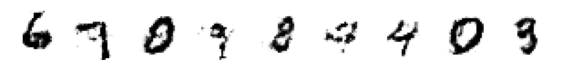

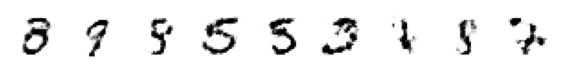

Epoch:70, Step:0, D-Loss:0.581, D-Acc:69.000, G-Loss:0.916
Epoch:70, Step:50, D-Loss:0.604, D-Acc:67.000, G-Loss:0.877
Epoch:70, Step:100, D-Loss:0.599, D-Acc:65.000, G-Loss:0.847
Epoch:70, Step:150, D-Loss:0.668, D-Acc:57.000, G-Loss:0.911
Epoch:70, Step:200, D-Loss:0.606, D-Acc:66.000, G-Loss:0.910
Epoch:70, Step:250, D-Loss:0.685, D-Acc:50.000, G-Loss:0.895
Epoch:70, Step:300, D-Loss:0.656, D-Acc:64.000, G-Loss:0.943
Epoch:70, Step:350, D-Loss:0.587, D-Acc:67.000, G-Loss:0.881
Epoch:70, Step:400, D-Loss:0.642, D-Acc:64.000, G-Loss:0.868
Epoch:70, Step:450, D-Loss:0.644, D-Acc:61.000, G-Loss:0.941
Epoch:71, Step:0, D-Loss:0.605, D-Acc:68.000, G-Loss:0.894
Epoch:71, Step:50, D-Loss:0.662, D-Acc:62.000, G-Loss:0.907
Epoch:71, Step:100, D-Loss:0.646, D-Acc:56.000, G-Loss:0.848
Epoch:71, Step:150, D-Loss:0.623, D-Acc:67.000, G-Loss:0.855
Epoch:71, Step:200, D-Loss:0.627, D-Acc:63.000, G-Loss:0.949
Epoch:71, Step:250, D-Loss:0.631, D-Acc:62.000, G-Loss:0.883
Epoch:71, Step:300, D-Loss:0.6

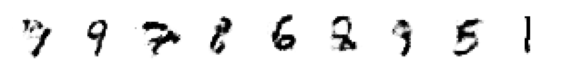

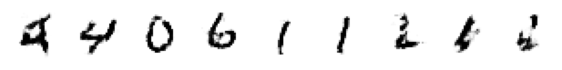

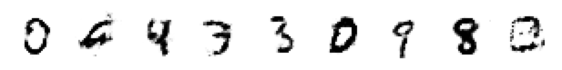

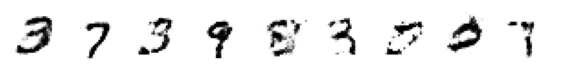

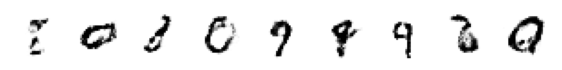

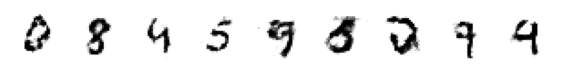

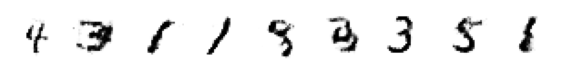

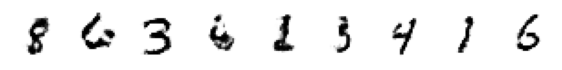

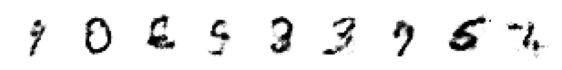

Epoch:80, Step:0, D-Loss:0.649, D-Acc:56.000, G-Loss:0.845
Epoch:80, Step:50, D-Loss:0.668, D-Acc:62.000, G-Loss:0.870
Epoch:80, Step:100, D-Loss:0.595, D-Acc:69.000, G-Loss:0.890
Epoch:80, Step:150, D-Loss:0.645, D-Acc:60.000, G-Loss:0.860
Epoch:80, Step:200, D-Loss:0.652, D-Acc:58.000, G-Loss:0.852
Epoch:80, Step:250, D-Loss:0.608, D-Acc:68.000, G-Loss:0.890
Epoch:80, Step:300, D-Loss:0.650, D-Acc:56.000, G-Loss:0.885
Epoch:80, Step:350, D-Loss:0.618, D-Acc:66.000, G-Loss:0.877
Epoch:80, Step:400, D-Loss:0.622, D-Acc:64.000, G-Loss:0.884
Epoch:80, Step:450, D-Loss:0.655, D-Acc:60.000, G-Loss:0.879
Epoch:81, Step:0, D-Loss:0.607, D-Acc:67.000, G-Loss:0.902
Epoch:81, Step:50, D-Loss:0.655, D-Acc:62.000, G-Loss:0.925
Epoch:81, Step:100, D-Loss:0.697, D-Acc:56.000, G-Loss:0.904
Epoch:81, Step:150, D-Loss:0.641, D-Acc:63.000, G-Loss:0.837
Epoch:81, Step:200, D-Loss:0.661, D-Acc:65.000, G-Loss:0.896
Epoch:81, Step:250, D-Loss:0.690, D-Acc:55.000, G-Loss:0.881
Epoch:81, Step:300, D-Loss:0.5

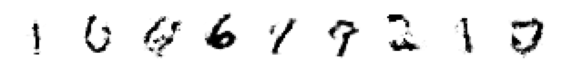

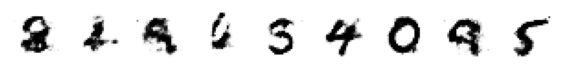

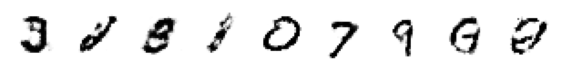

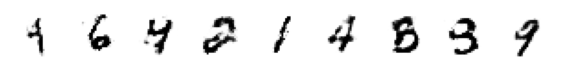

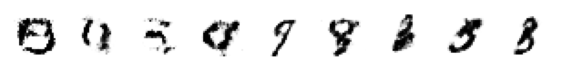

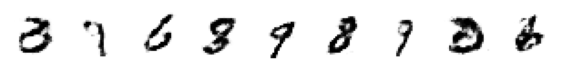

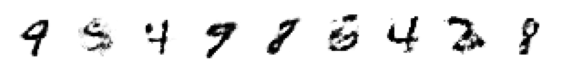

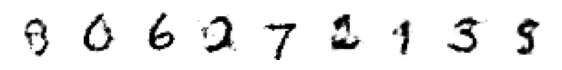

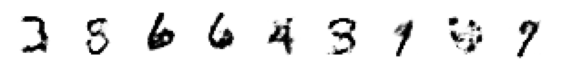

Epoch:90, Step:0, D-Loss:0.685, D-Acc:55.000, G-Loss:0.879
Epoch:90, Step:50, D-Loss:0.635, D-Acc:64.000, G-Loss:0.882
Epoch:90, Step:100, D-Loss:0.650, D-Acc:59.000, G-Loss:0.821
Epoch:90, Step:150, D-Loss:0.652, D-Acc:60.000, G-Loss:0.871
Epoch:90, Step:200, D-Loss:0.603, D-Acc:64.000, G-Loss:0.830
Epoch:90, Step:250, D-Loss:0.613, D-Acc:62.000, G-Loss:0.823
Epoch:90, Step:300, D-Loss:0.640, D-Acc:61.000, G-Loss:0.892
Epoch:90, Step:350, D-Loss:0.661, D-Acc:61.000, G-Loss:0.831
Epoch:90, Step:400, D-Loss:0.625, D-Acc:64.000, G-Loss:0.855
Epoch:90, Step:450, D-Loss:0.632, D-Acc:67.000, G-Loss:0.876
Epoch:91, Step:0, D-Loss:0.573, D-Acc:73.000, G-Loss:0.848
Epoch:91, Step:50, D-Loss:0.605, D-Acc:67.000, G-Loss:0.899
Epoch:91, Step:100, D-Loss:0.585, D-Acc:68.000, G-Loss:0.860
Epoch:91, Step:150, D-Loss:0.642, D-Acc:63.000, G-Loss:0.921
Epoch:91, Step:200, D-Loss:0.600, D-Acc:60.000, G-Loss:0.847
Epoch:91, Step:250, D-Loss:0.655, D-Acc:60.000, G-Loss:0.894
Epoch:91, Step:300, D-Loss:0.6

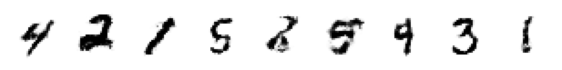

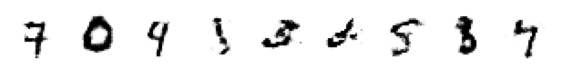

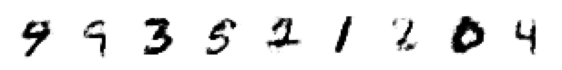

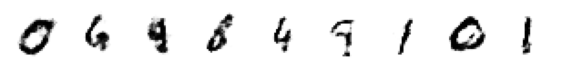

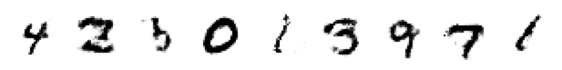

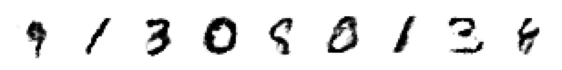

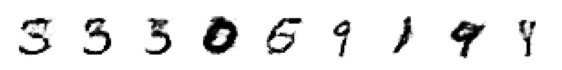

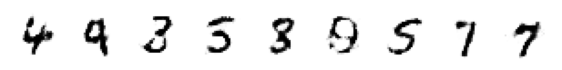

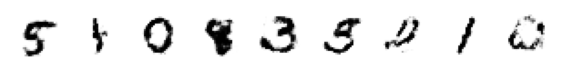

Epoch:100, Step:0, D-Loss:0.647, D-Acc:67.000, G-Loss:0.861
Epoch:100, Step:50, D-Loss:0.645, D-Acc:63.000, G-Loss:0.896
Epoch:100, Step:100, D-Loss:0.650, D-Acc:60.000, G-Loss:0.873
Epoch:100, Step:150, D-Loss:0.650, D-Acc:61.000, G-Loss:0.858
Epoch:100, Step:200, D-Loss:0.628, D-Acc:63.000, G-Loss:0.874
Epoch:100, Step:250, D-Loss:0.553, D-Acc:75.000, G-Loss:0.828
Epoch:100, Step:300, D-Loss:0.617, D-Acc:60.000, G-Loss:0.876
Epoch:100, Step:350, D-Loss:0.707, D-Acc:51.000, G-Loss:0.862
Epoch:100, Step:400, D-Loss:0.647, D-Acc:67.000, G-Loss:0.880
Epoch:100, Step:450, D-Loss:0.652, D-Acc:61.000, G-Loss:0.855
Epoch:101, Step:0, D-Loss:0.594, D-Acc:66.000, G-Loss:0.823
Epoch:101, Step:50, D-Loss:0.591, D-Acc:68.000, G-Loss:0.922
Epoch:101, Step:100, D-Loss:0.633, D-Acc:61.000, G-Loss:0.942
Epoch:101, Step:150, D-Loss:0.629, D-Acc:67.000, G-Loss:0.854
Epoch:101, Step:200, D-Loss:0.691, D-Acc:57.000, G-Loss:0.900
Epoch:101, Step:250, D-Loss:0.595, D-Acc:68.000, G-Loss:0.841
Epoch:101, Ste

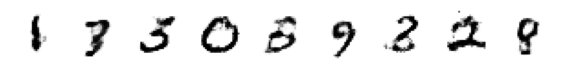

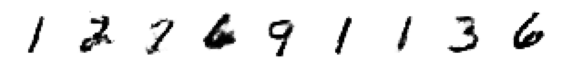

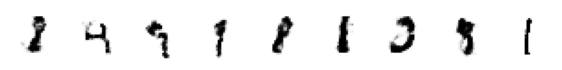

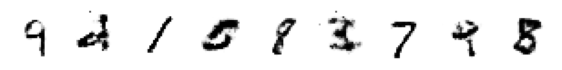

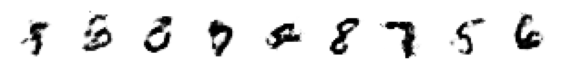

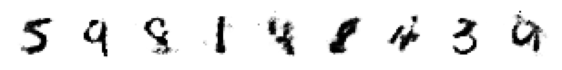

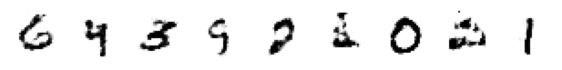

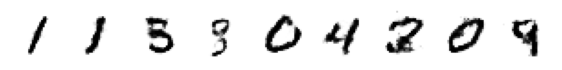

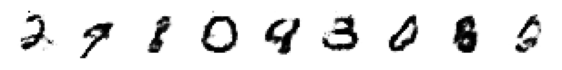

Epoch:110, Step:0, D-Loss:0.659, D-Acc:59.000, G-Loss:0.859
Epoch:110, Step:50, D-Loss:0.692, D-Acc:55.000, G-Loss:0.873
Epoch:110, Step:100, D-Loss:0.596, D-Acc:67.000, G-Loss:0.800
Epoch:110, Step:150, D-Loss:0.666, D-Acc:57.000, G-Loss:0.847
Epoch:110, Step:200, D-Loss:0.609, D-Acc:65.000, G-Loss:0.864
Epoch:110, Step:250, D-Loss:0.671, D-Acc:60.000, G-Loss:0.886
Epoch:110, Step:300, D-Loss:0.619, D-Acc:66.000, G-Loss:0.848
Epoch:110, Step:350, D-Loss:0.576, D-Acc:72.000, G-Loss:0.856
Epoch:110, Step:400, D-Loss:0.632, D-Acc:69.000, G-Loss:0.880
Epoch:110, Step:450, D-Loss:0.632, D-Acc:64.000, G-Loss:0.906
Epoch:111, Step:0, D-Loss:0.672, D-Acc:63.000, G-Loss:0.887
Epoch:111, Step:50, D-Loss:0.653, D-Acc:60.000, G-Loss:0.867
Epoch:111, Step:100, D-Loss:0.631, D-Acc:66.000, G-Loss:0.888
Epoch:111, Step:150, D-Loss:0.663, D-Acc:58.000, G-Loss:0.897
Epoch:111, Step:200, D-Loss:0.613, D-Acc:62.000, G-Loss:0.892
Epoch:111, Step:250, D-Loss:0.591, D-Acc:68.000, G-Loss:0.930
Epoch:111, Ste

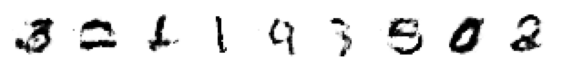

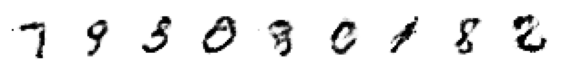

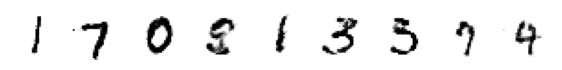

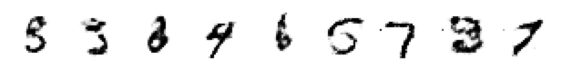

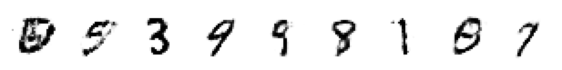

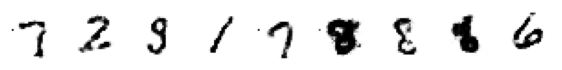

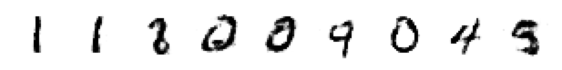

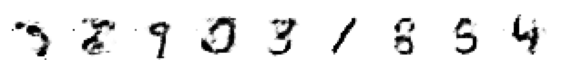

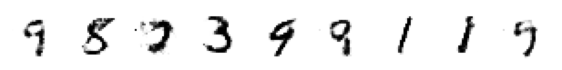

Epoch:120, Step:0, D-Loss:0.611, D-Acc:65.000, G-Loss:0.859
Epoch:120, Step:50, D-Loss:0.632, D-Acc:63.000, G-Loss:0.884
Epoch:120, Step:100, D-Loss:0.667, D-Acc:57.000, G-Loss:0.877
Epoch:120, Step:150, D-Loss:0.639, D-Acc:61.000, G-Loss:0.887
Epoch:120, Step:200, D-Loss:0.600, D-Acc:68.000, G-Loss:0.875
Epoch:120, Step:250, D-Loss:0.630, D-Acc:61.000, G-Loss:0.837
Epoch:120, Step:300, D-Loss:0.682, D-Acc:55.000, G-Loss:0.883
Epoch:120, Step:350, D-Loss:0.599, D-Acc:67.000, G-Loss:0.859
Epoch:120, Step:400, D-Loss:0.658, D-Acc:66.000, G-Loss:0.886
Epoch:120, Step:450, D-Loss:0.688, D-Acc:59.000, G-Loss:0.865
Epoch:121, Step:0, D-Loss:0.590, D-Acc:67.000, G-Loss:0.866
Epoch:121, Step:50, D-Loss:0.606, D-Acc:66.000, G-Loss:0.853
Epoch:121, Step:100, D-Loss:0.622, D-Acc:65.000, G-Loss:0.889
Epoch:121, Step:150, D-Loss:0.665, D-Acc:59.000, G-Loss:0.861
Epoch:121, Step:200, D-Loss:0.639, D-Acc:64.000, G-Loss:0.953
Epoch:121, Step:250, D-Loss:0.639, D-Acc:65.000, G-Loss:0.916
Epoch:121, Ste

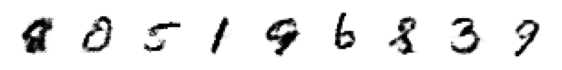

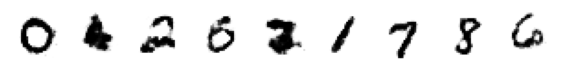

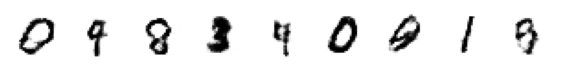

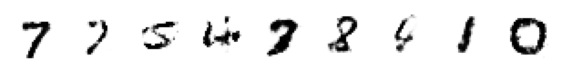

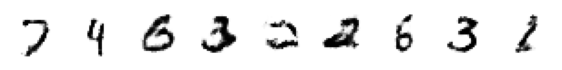

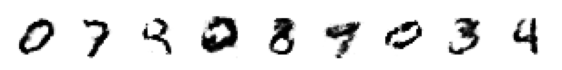

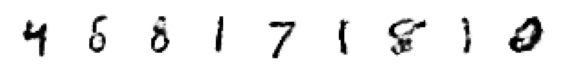

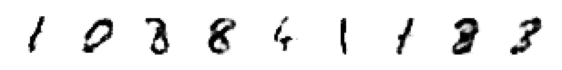

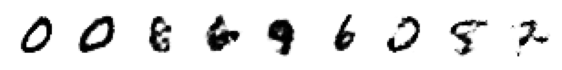

Epoch:130, Step:0, D-Loss:0.638, D-Acc:63.000, G-Loss:0.864
Epoch:130, Step:50, D-Loss:0.624, D-Acc:65.000, G-Loss:0.928
Epoch:130, Step:100, D-Loss:0.622, D-Acc:64.000, G-Loss:0.926
Epoch:130, Step:150, D-Loss:0.660, D-Acc:64.000, G-Loss:0.961
Epoch:130, Step:200, D-Loss:0.596, D-Acc:69.000, G-Loss:0.861
Epoch:130, Step:250, D-Loss:0.608, D-Acc:66.000, G-Loss:0.894
Epoch:130, Step:300, D-Loss:0.569, D-Acc:71.000, G-Loss:0.834
Epoch:130, Step:350, D-Loss:0.586, D-Acc:74.000, G-Loss:0.941
Epoch:130, Step:400, D-Loss:0.572, D-Acc:71.000, G-Loss:0.822
Epoch:130, Step:450, D-Loss:0.574, D-Acc:76.000, G-Loss:0.887
Epoch:131, Step:0, D-Loss:0.575, D-Acc:67.000, G-Loss:0.853
Epoch:131, Step:50, D-Loss:0.663, D-Acc:60.000, G-Loss:0.952
Epoch:131, Step:100, D-Loss:0.644, D-Acc:63.000, G-Loss:0.847
Epoch:131, Step:150, D-Loss:0.652, D-Acc:63.000, G-Loss:0.833
Epoch:131, Step:200, D-Loss:0.607, D-Acc:68.000, G-Loss:0.864
Epoch:131, Step:250, D-Loss:0.564, D-Acc:74.000, G-Loss:0.865
Epoch:131, Ste

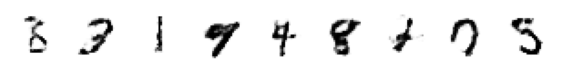

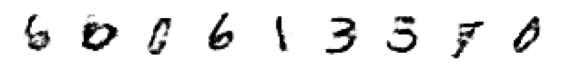

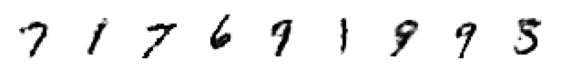

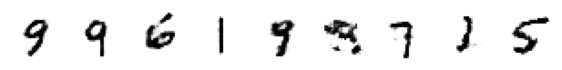

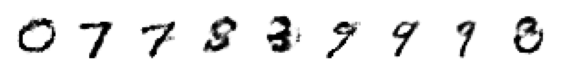

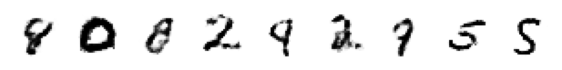

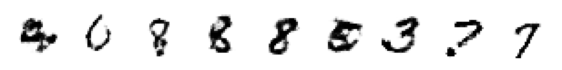

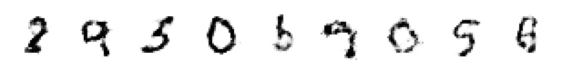

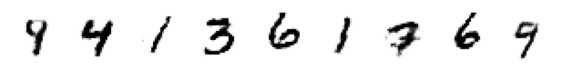

Epoch:140, Step:0, D-Loss:0.620, D-Acc:63.000, G-Loss:0.922
Epoch:140, Step:50, D-Loss:0.656, D-Acc:64.000, G-Loss:0.903
Epoch:140, Step:100, D-Loss:0.598, D-Acc:69.000, G-Loss:0.884
Epoch:140, Step:150, D-Loss:0.639, D-Acc:69.000, G-Loss:0.892
Epoch:140, Step:200, D-Loss:0.617, D-Acc:67.000, G-Loss:0.901
Epoch:140, Step:250, D-Loss:0.676, D-Acc:57.000, G-Loss:0.871
Epoch:140, Step:300, D-Loss:0.620, D-Acc:68.000, G-Loss:0.911
Epoch:140, Step:350, D-Loss:0.623, D-Acc:64.000, G-Loss:0.897
Epoch:140, Step:400, D-Loss:0.606, D-Acc:69.000, G-Loss:0.862
Epoch:140, Step:450, D-Loss:0.599, D-Acc:68.000, G-Loss:0.902
Epoch:141, Step:0, D-Loss:0.610, D-Acc:68.000, G-Loss:0.903
Epoch:141, Step:50, D-Loss:0.669, D-Acc:57.000, G-Loss:0.891
Epoch:141, Step:100, D-Loss:0.580, D-Acc:72.000, G-Loss:0.907
Epoch:141, Step:150, D-Loss:0.598, D-Acc:66.000, G-Loss:0.971
Epoch:141, Step:200, D-Loss:0.562, D-Acc:71.000, G-Loss:0.965
Epoch:141, Step:250, D-Loss:0.607, D-Acc:68.000, G-Loss:0.875
Epoch:141, Ste

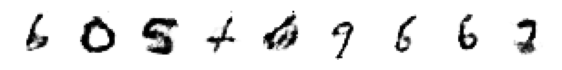

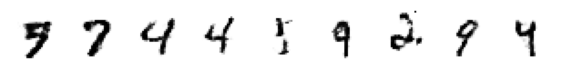

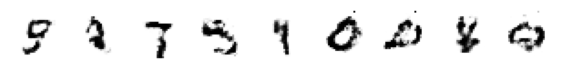

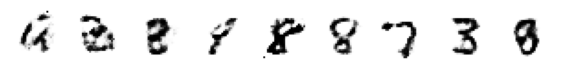

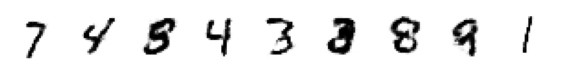

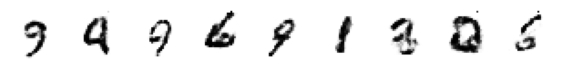

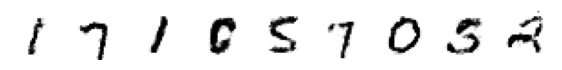

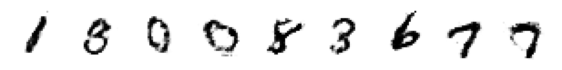

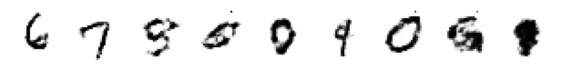

Epoch:150, Step:0, D-Loss:0.664, D-Acc:61.000, G-Loss:0.896
Epoch:150, Step:50, D-Loss:0.614, D-Acc:69.000, G-Loss:0.806
Epoch:150, Step:100, D-Loss:0.663, D-Acc:62.000, G-Loss:0.847
Epoch:150, Step:150, D-Loss:0.597, D-Acc:69.000, G-Loss:0.945
Epoch:150, Step:200, D-Loss:0.642, D-Acc:59.000, G-Loss:0.932
Epoch:150, Step:250, D-Loss:0.659, D-Acc:61.000, G-Loss:0.874
Epoch:150, Step:300, D-Loss:0.587, D-Acc:67.000, G-Loss:0.930
Epoch:150, Step:350, D-Loss:0.574, D-Acc:66.000, G-Loss:0.912
Epoch:150, Step:400, D-Loss:0.677, D-Acc:58.000, G-Loss:0.929
Epoch:150, Step:450, D-Loss:0.604, D-Acc:65.000, G-Loss:0.946
Epoch:151, Step:0, D-Loss:0.610, D-Acc:65.000, G-Loss:0.926
Epoch:151, Step:50, D-Loss:0.581, D-Acc:64.000, G-Loss:0.846
Epoch:151, Step:100, D-Loss:0.631, D-Acc:68.000, G-Loss:0.949
Epoch:151, Step:150, D-Loss:0.675, D-Acc:58.000, G-Loss:0.911
Epoch:151, Step:200, D-Loss:0.642, D-Acc:63.000, G-Loss:0.865
Epoch:151, Step:250, D-Loss:0.585, D-Acc:68.000, G-Loss:0.927
Epoch:151, Ste

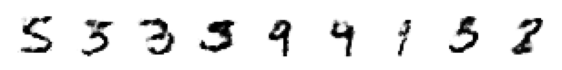

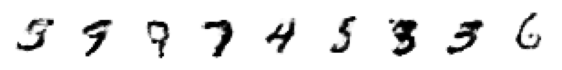

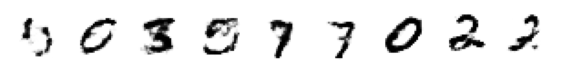

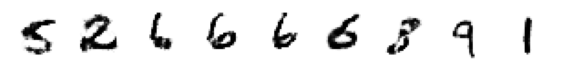

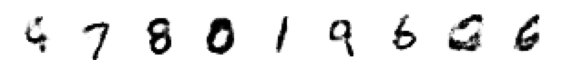

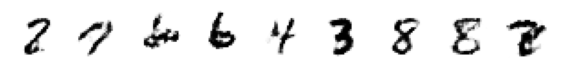

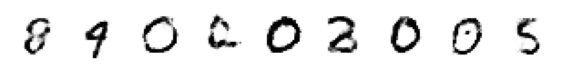

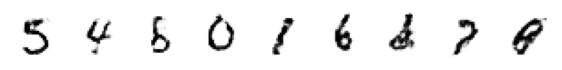

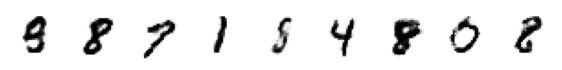

Epoch:160, Step:0, D-Loss:0.626, D-Acc:64.000, G-Loss:0.978
Epoch:160, Step:50, D-Loss:0.582, D-Acc:68.000, G-Loss:0.889
Epoch:160, Step:100, D-Loss:0.623, D-Acc:67.000, G-Loss:0.921
Epoch:160, Step:150, D-Loss:0.623, D-Acc:66.000, G-Loss:0.960
Epoch:160, Step:200, D-Loss:0.546, D-Acc:69.000, G-Loss:0.914
Epoch:160, Step:250, D-Loss:0.660, D-Acc:62.000, G-Loss:0.917
Epoch:160, Step:300, D-Loss:0.637, D-Acc:64.000, G-Loss:0.912
Epoch:160, Step:350, D-Loss:0.602, D-Acc:68.000, G-Loss:0.947
Epoch:160, Step:400, D-Loss:0.599, D-Acc:64.000, G-Loss:0.893
Epoch:160, Step:450, D-Loss:0.674, D-Acc:62.000, G-Loss:0.910
Epoch:161, Step:0, D-Loss:0.659, D-Acc:61.000, G-Loss:0.913
Epoch:161, Step:50, D-Loss:0.586, D-Acc:63.000, G-Loss:0.890
Epoch:161, Step:100, D-Loss:0.629, D-Acc:61.000, G-Loss:0.855
Epoch:161, Step:150, D-Loss:0.570, D-Acc:70.000, G-Loss:0.918
Epoch:161, Step:200, D-Loss:0.587, D-Acc:71.000, G-Loss:0.969
Epoch:161, Step:250, D-Loss:0.634, D-Acc:63.000, G-Loss:0.939
Epoch:161, Ste

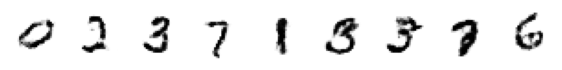

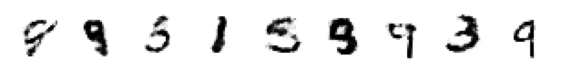

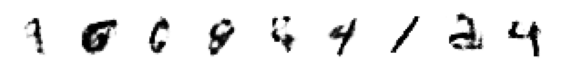

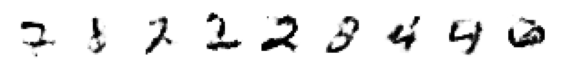

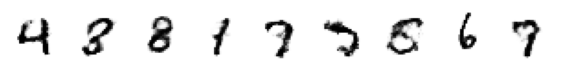

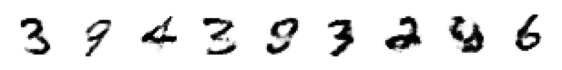

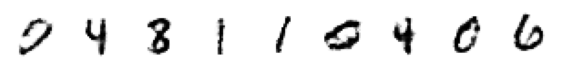

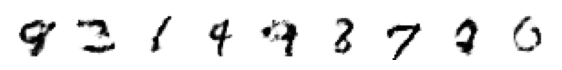

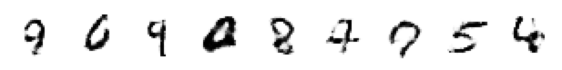

Epoch:170, Step:0, D-Loss:0.616, D-Acc:70.000, G-Loss:0.928
Epoch:170, Step:50, D-Loss:0.609, D-Acc:65.000, G-Loss:0.956
Epoch:170, Step:100, D-Loss:0.628, D-Acc:63.000, G-Loss:0.947
Epoch:170, Step:150, D-Loss:0.566, D-Acc:74.000, G-Loss:0.907
Epoch:170, Step:200, D-Loss:0.661, D-Acc:59.000, G-Loss:0.896
Epoch:170, Step:250, D-Loss:0.620, D-Acc:67.000, G-Loss:0.941
Epoch:170, Step:300, D-Loss:0.613, D-Acc:64.000, G-Loss:0.928
Epoch:170, Step:350, D-Loss:0.643, D-Acc:61.000, G-Loss:0.980
Epoch:170, Step:400, D-Loss:0.557, D-Acc:70.000, G-Loss:0.949
Epoch:170, Step:450, D-Loss:0.618, D-Acc:63.000, G-Loss:0.941
Epoch:171, Step:0, D-Loss:0.598, D-Acc:67.000, G-Loss:0.898
Epoch:171, Step:50, D-Loss:0.577, D-Acc:70.000, G-Loss:0.922
Epoch:171, Step:100, D-Loss:0.653, D-Acc:65.000, G-Loss:0.864
Epoch:171, Step:150, D-Loss:0.593, D-Acc:68.000, G-Loss:0.899
Epoch:171, Step:200, D-Loss:0.660, D-Acc:63.000, G-Loss:0.942
Epoch:171, Step:250, D-Loss:0.583, D-Acc:67.000, G-Loss:1.022
Epoch:171, Ste

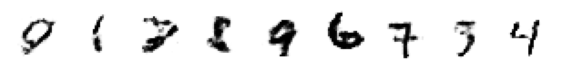

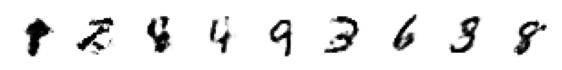

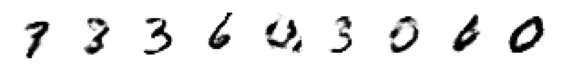

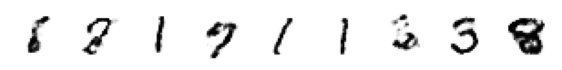

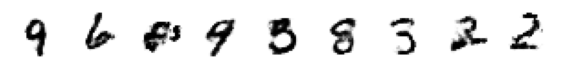

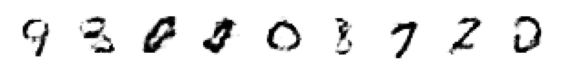

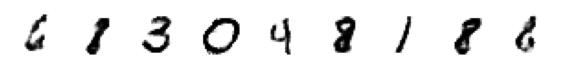

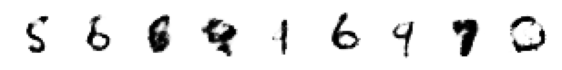

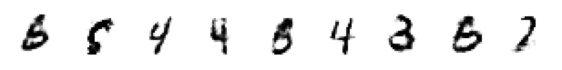

Epoch:180, Step:0, D-Loss:0.597, D-Acc:69.000, G-Loss:0.913
Epoch:180, Step:50, D-Loss:0.548, D-Acc:71.000, G-Loss:0.890
Epoch:180, Step:100, D-Loss:0.625, D-Acc:63.000, G-Loss:0.975
Epoch:180, Step:150, D-Loss:0.642, D-Acc:66.000, G-Loss:0.905
Epoch:180, Step:200, D-Loss:0.596, D-Acc:71.000, G-Loss:0.913
Epoch:180, Step:250, D-Loss:0.594, D-Acc:68.000, G-Loss:0.880
Epoch:180, Step:300, D-Loss:0.604, D-Acc:66.000, G-Loss:0.951
Epoch:180, Step:350, D-Loss:0.664, D-Acc:59.000, G-Loss:0.921
Epoch:180, Step:400, D-Loss:0.642, D-Acc:64.000, G-Loss:0.973
Epoch:180, Step:450, D-Loss:0.604, D-Acc:67.000, G-Loss:0.931
Epoch:181, Step:0, D-Loss:0.601, D-Acc:67.000, G-Loss:0.954
Epoch:181, Step:50, D-Loss:0.629, D-Acc:66.000, G-Loss:0.952
Epoch:181, Step:100, D-Loss:0.607, D-Acc:63.000, G-Loss:0.913
Epoch:181, Step:150, D-Loss:0.618, D-Acc:61.000, G-Loss:0.911
Epoch:181, Step:200, D-Loss:0.667, D-Acc:65.000, G-Loss:0.835
Epoch:181, Step:250, D-Loss:0.638, D-Acc:66.000, G-Loss:0.979
Epoch:181, Ste

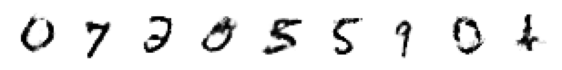

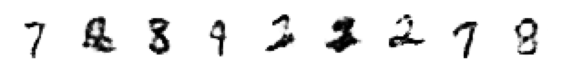

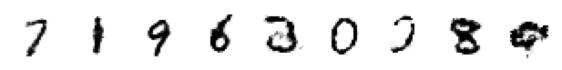

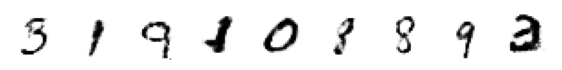

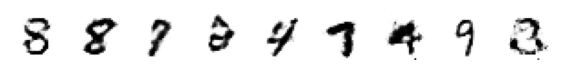

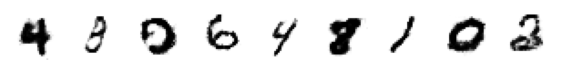

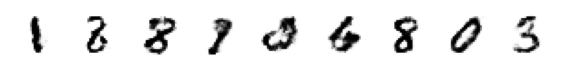

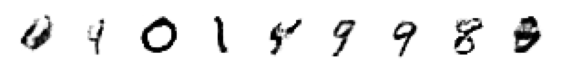

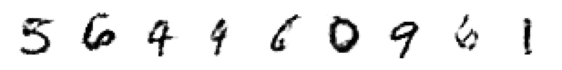

Epoch:190, Step:0, D-Loss:0.629, D-Acc:63.000, G-Loss:0.941
Epoch:190, Step:50, D-Loss:0.664, D-Acc:62.000, G-Loss:0.987
Epoch:190, Step:100, D-Loss:0.615, D-Acc:60.000, G-Loss:0.947
Epoch:190, Step:150, D-Loss:0.580, D-Acc:72.000, G-Loss:0.926
Epoch:190, Step:200, D-Loss:0.613, D-Acc:71.000, G-Loss:0.960
Epoch:190, Step:250, D-Loss:0.581, D-Acc:64.000, G-Loss:0.876
Epoch:190, Step:300, D-Loss:0.640, D-Acc:63.000, G-Loss:0.851
Epoch:190, Step:350, D-Loss:0.570, D-Acc:68.000, G-Loss:1.020
Epoch:190, Step:400, D-Loss:0.549, D-Acc:76.000, G-Loss:0.871
Epoch:190, Step:450, D-Loss:0.627, D-Acc:67.000, G-Loss:0.875
Epoch:191, Step:0, D-Loss:0.669, D-Acc:62.000, G-Loss:0.938
Epoch:191, Step:50, D-Loss:0.606, D-Acc:69.000, G-Loss:0.937
Epoch:191, Step:100, D-Loss:0.583, D-Acc:67.000, G-Loss:0.980
Epoch:191, Step:150, D-Loss:0.623, D-Acc:67.000, G-Loss:0.918
Epoch:191, Step:200, D-Loss:0.614, D-Acc:67.000, G-Loss:0.914
Epoch:191, Step:250, D-Loss:0.671, D-Acc:68.000, G-Loss:0.911
Epoch:191, Ste

In [12]:
epochs = 200
batch_size = 100
steps = 500
noise_size = 50

losses_d = []
losses_g = []

for i in range(0, epochs):
    if (i%10 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))

        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))

        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)

        gan_input = get_random_noise(batch_size, noise_size)

        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))

        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)

        losses_d.append(loss_d[0])
        losses_g.append(loss_g)

        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))

# Show Results

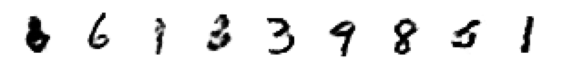

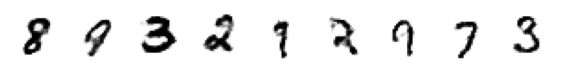

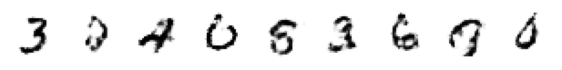

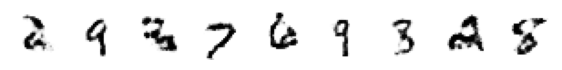

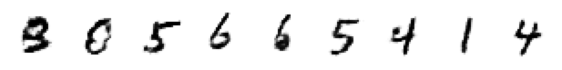

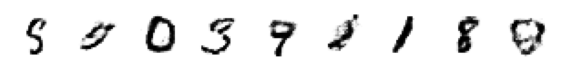

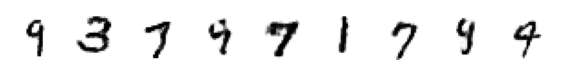

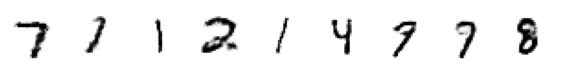

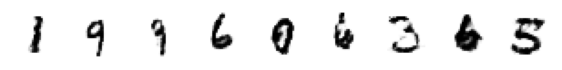

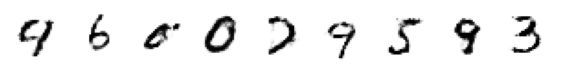

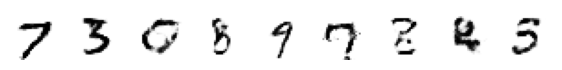

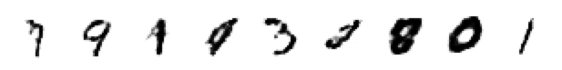

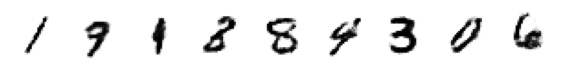

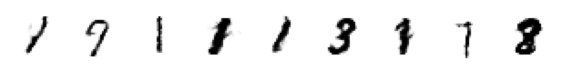

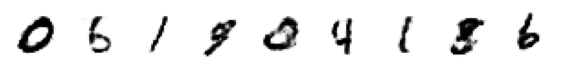

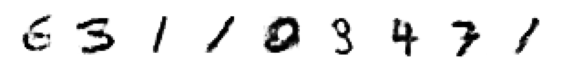

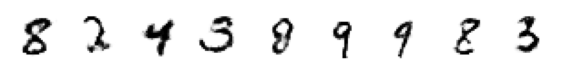

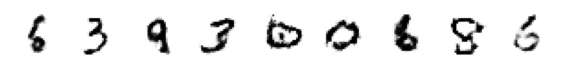

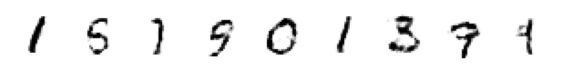

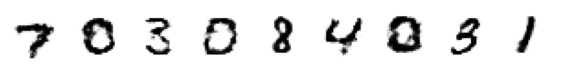

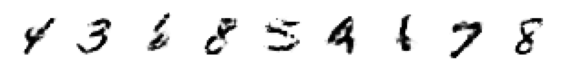

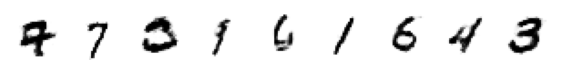

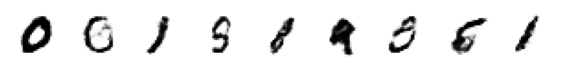

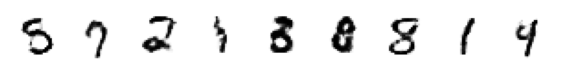

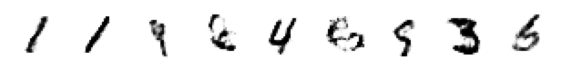

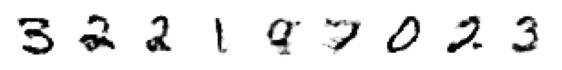

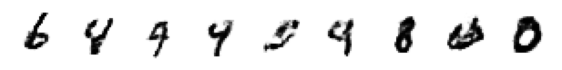

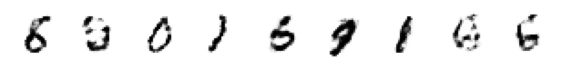

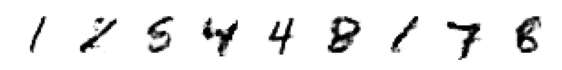

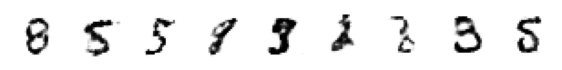

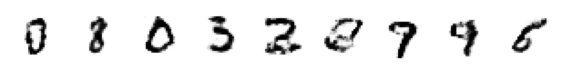

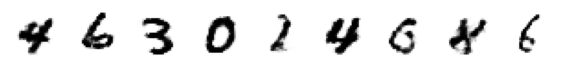

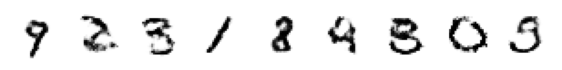

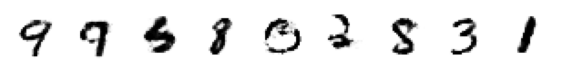

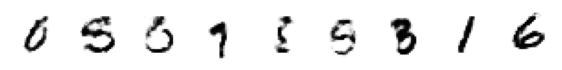

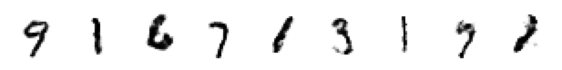

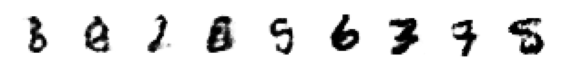

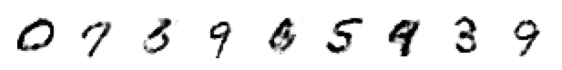

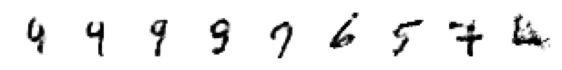

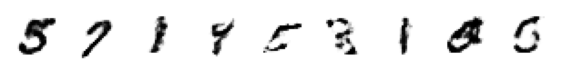

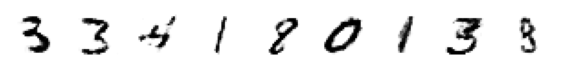

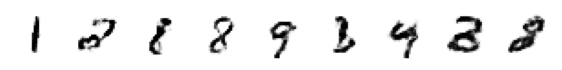

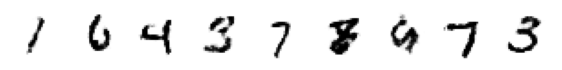

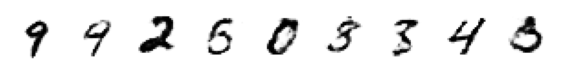

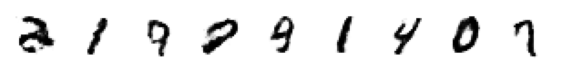

In [13]:
#Generating Unlimited samples
for i in range(5):
    show_generator_results(generator_network)

# Plot GAN loss

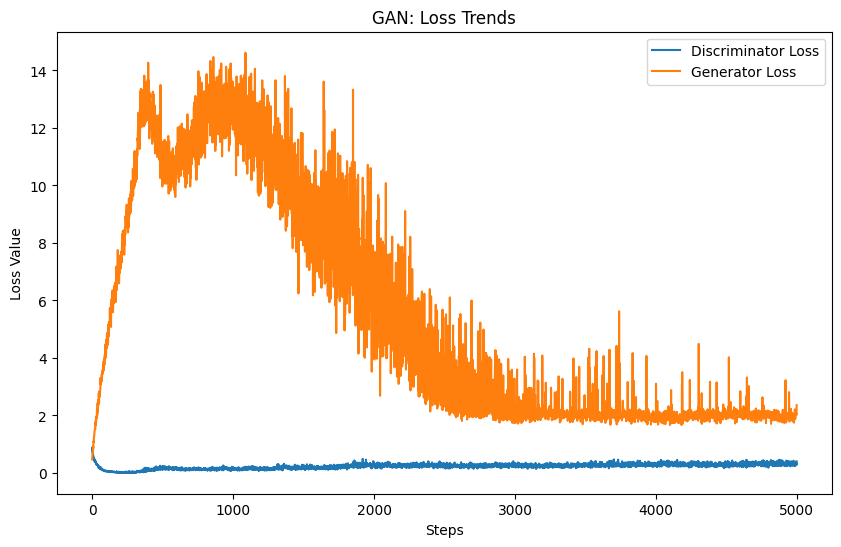

In [14]:
steps = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d[:5000])
plt.plot(losses_g[:5000])
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("GAN: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()

[What is GAN, Maths behind it and Code explanation](https://chat.openai.com/share/b96e32e5-a9c6-4218-893e-94959d48da41)

[More code explanation and GAN accuracy](https://chat.openai.com/share/c16efdb9-5856-4c5c-9322-b2bc18d0de73)

[Overfitting and Underfitting in GAN](https://chat.openai.com/share/d3c13d74-b249-4060-83eb-b224d07e3758)

[Real life use cases of GAN](https://chat.openai.com/share/640cdf2f-a496-4d54-a658-77af2e5d1f7e)

[Error resolved](https://stackoverflow.com/questions/74684240/keyerror-the-optimizer-cannot-recognize-variable-dense-1-kernel0-for-pretrai)